In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('axes', labelsize = 16, labelpad = 20)

In [45]:
df = pd.read_csv(
    'insurance.csv'
)
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [46]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [47]:
X = df[['age','sex','bmi','children','smoker','region']]
Y = df['charges']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=7)

In [49]:
x_train['charges'] = y_train

In [50]:
model = smf.ols(formula = 'charges ~ age + bmi * C(smoker) + C(children) + C(smoker) + C(region)', data = df).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     585.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:05:02   Log-Likelihood:                -13246.
No. Observations:                1338   AIC:                         2.652e+04
Df Residuals:                    1325   BIC:                         2.659e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2415

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
y_pred = model.predict(x_test)

In [57]:
y_pred

13      12030.889776
1052    11488.890684
172      2680.243716
1085    14883.601846
683     11522.129956
            ...     
1014     6990.586394
984      5309.124045
262     27527.980847
189      6859.338945
1140    10701.065557
Length: 134, dtype: float64

In [54]:
mean_squared_error(y_true = y_test, y_pred=y_pred)

28439014.579237882

In [55]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges'>

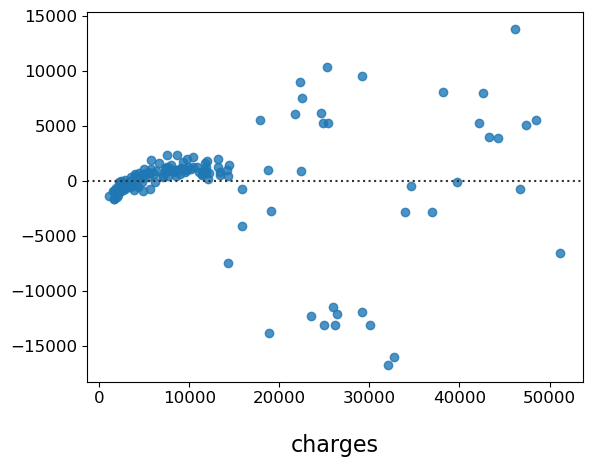

In [56]:
sns.residplot(
    x = y_test,
    y = y_pred
)